In [2]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

import requests
import glob


In [3]:

df1 = pd.read_csv("E:/data science/Singapore  Resale Flat Prices Predicting/ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2 = pd.read_csv("E:/data science/Singapore  Resale Flat Prices Predicting/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv("E:/data science/Singapore  Resale Flat Prices Predicting/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv("E:/data science/Singapore  Resale Flat Prices Predicting/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5 = pd.read_csv("E:/data science/Singapore  Resale Flat Prices Predicting/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df = pd.concat([df1 , df2 , df3, df4, df5],axis=0)
df.head()
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
173801,2024-02,YISHUN,EXECUTIVE,614,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,800000.0,62 years 03 months
173802,2024-02,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,935000.0,62 years 10 months
173803,2024-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,908000.0,62 years 11 months
173804,2024-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,800000.0,63 years


In [4]:
df.nunique()

month                   410
town                     27
flat_type                 8
block                  2706
street_name             584
storey_range             25
floor_area_sqm          211
flat_model               34
lease_commence_date      56
resale_price           9413
remaining_lease         722
dtype: int64

In [5]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [6]:
df.shape

(920009, 11)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,920009.0,95.694593,25.838884,28.0,73.0,93.0,113.0,307.0
lease_commence_date,920009.0,1988.199518,10.583557,1966.0,1981.0,1986.0,1996.0,2022.0
resale_price,920009.0,318603.395050,168567.655778,5000.0,192000.0,295000.0,415000.0,1568888.0


REMAINING_LEASE


In [8]:
def convert_to_years(row):
    if pd.notna(row) and isinstance(row, str):
        if 'years' in row:
            parts = row.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
    return row
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)

In [9]:
# fill null values in remaining_lease with mode beacuse null value more than 25% it will remove affected in accuracy
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
173801,2024-02,YISHUN,EXECUTIVE,614,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,800000.0,62.250000
173802,2024-02,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,935000.0,62.833333
173803,2024-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,908000.0,62.916667
173804,2024-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,800000.0,63.000000
173805,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62.916667


In [10]:
df['remaining_lease'].value_counts()

remaining_lease
68.000000    711638
95.000000      2311
67.000000      2209
69.000000      1911
71.000000      1753
              ...  
97.583333         1
97.750000         1
97.250000         1
41.750000         1
96.833333         1
Name: count, Length: 669, dtype: int64

In [11]:
# droping remaining_lease missing values
df = df.dropna()
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [12]:
#Month column

# Separate the year and month of resale beacuse this is time series Data
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

# drop the resale month column
df.drop('month', axis = 1, inplace= True)

df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01


In [13]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [14]:
# Split the 'Range' column into lower and upper bounds
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

df.tail(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
173804,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,800000.0,63.000000,2024,02,1,3
173805,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62.916667,2024,02,4,6


In [15]:
df.drop('storey_range', axis = 1, inplace= True)

In [16]:
# CONVERTING

df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [17]:
df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,68.0,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,68.0,1990,1,4,6


In [18]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

TEXT ERRORS

In [19]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [20]:
df['town'].value_counts()

town
TAMPINES           79434
YISHUN             69587
BEDOK              66297
JURONG WEST        66173
WOODLANDS          65033
ANG MO KIO         51822
HOUGANG            50353
BUKIT BATOK        43967
CHOA CHU KANG      37973
BUKIT MERAH        34079
PASIR RIS          33051
SENGKANG           31984
TOA PAYOH          31348
QUEENSTOWN         28599
GEYLANG            28025
CLEMENTI           27893
BUKIT PANJANG      27482
KALLANG/WHAMPOA    26951
JURONG EAST        24630
SERANGOON          22711
BISHAN             21169
PUNGGOL            20155
SEMBAWANG          13625
MARINE PARADE       8005
CENTRAL AREA        7096
BUKIT TIMAH         2503
LIM CHU KANG          64
Name: count, dtype: int64

In [21]:
df['flat_type'].value_counts()

flat_type
4 ROOM              349314
3 ROOM              294202
5 ROOM              193798
EXECUTIVE            69222
2 ROOM               11633
1 ROOM                1300
MULTI GENERATION       279
MULTI-GENERATION       261
Name: count, dtype: int64

In [22]:
# Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid duplicate
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [23]:
df['flat_type'].value_counts()

flat_type
4 ROOM              349314
3 ROOM              294202
5 ROOM              193798
EXECUTIVE            69222
2 ROOM               11633
1 ROOM                1300
MULTI GENERATION       540
Name: count, dtype: int64

In [24]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17521
BEDOK RESERVOIR RD    14663
ANG MO KIO AVE 10     13755
ANG MO KIO AVE 3      12104
HOUGANG AVE 8          9316
                      ...  
GEYLANG EAST AVE 2       15
SEMBAWANG WAY            14
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
Name: count, Length: 584, dtype: int64

In [25]:
df['flat_model'].value_counts()

flat_model
Model A                   191921
Improved                  166522
New Generation            109259
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          46074
Simplified                 34039
Apartment                  25349
Standard                   24998
SIMPLIFIED                 23258
STANDARD                   17375
Maisonette                 17284
MAISONETTE                 12215
Model A2                   10064
APARTMENT                   9901
DBSS                        3235
Adjoined flat               1238
Model A-Maisonette          1083
MODEL A-MAISONETTE           982
Terrace                      443
Type S1                      431
MULTI GENERATION             279
Multi Generation             261
TERRACE                      247
Type S2                      214
Premium Apartment Loft       107
2-room                        97
Premium Maisonette            86
Improved-Maisonette           81

In [26]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})
df['flat_model'].value_counts()

flat_model
Model A                   262302
Improved                  240111
New Generation            188157
Simplified                 57297
Premium Apartment          46080
Standard                   42373
Apartment                  35250
Maisonette                 29499
Model A2                   10064
DBSS                        3235
Model A-Maisonette          2065
Adjoined flat               1238
Terrace                      690
Multi Generation             540
Type S1                      431
Type S2                      214
Improved-Maisonette          125
2-room                       118
Premium Apartment Loft       107
Premium Maisonette            86
3Gen                          27
Name: count, dtype: int64

Duplicates

In [27]:
df.duplicated().sum()

2333

In [28]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Outliers

In [29]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [30]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

In [31]:
df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977,9000.0,68.000000,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977,6000.0,68.000000,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977,8000.0,68.000000,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977,6000.0,68.000000,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,New Generation,1976,47200.0,68.000000,1990,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173801,YISHUN,EXECUTIVE,614.0,YISHUN ST 61,142.0,Apartment,1987,800000.0,62.250000,2024,2,7,9
173802,YISHUN,EXECUTIVE,824.0,YISHUN ST 81,146.0,Maisonette,1987,935000.0,62.833333,2024,2,7,9
173803,YISHUN,EXECUTIVE,826.0,YISHUN ST 81,146.0,Maisonette,1988,908000.0,62.916667,2024,2,4,6
173804,YISHUN,EXECUTIVE,826.0,YISHUN ST 81,146.0,Maisonette,1988,800000.0,63.000000,2024,2,1,3


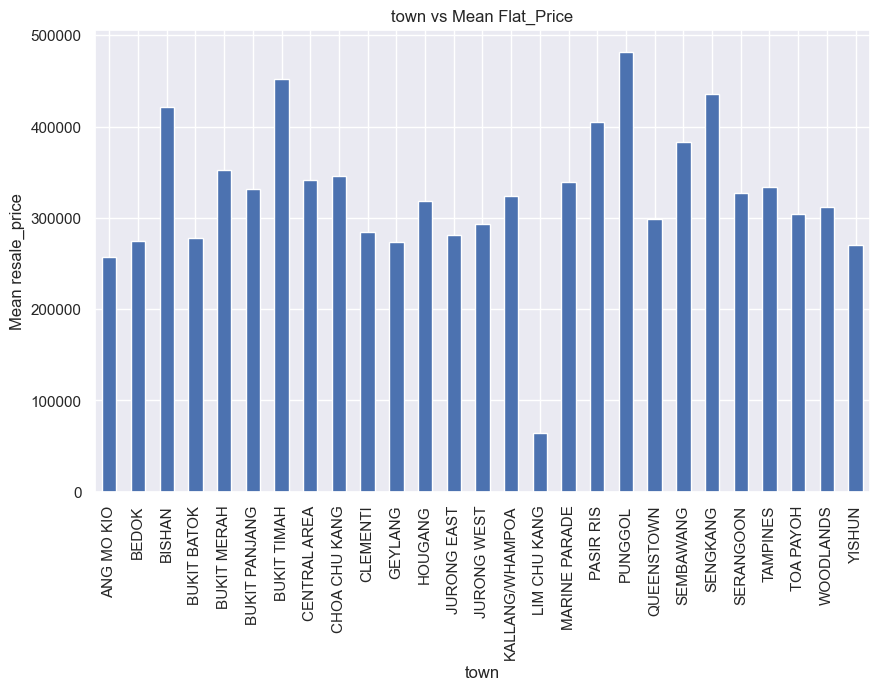

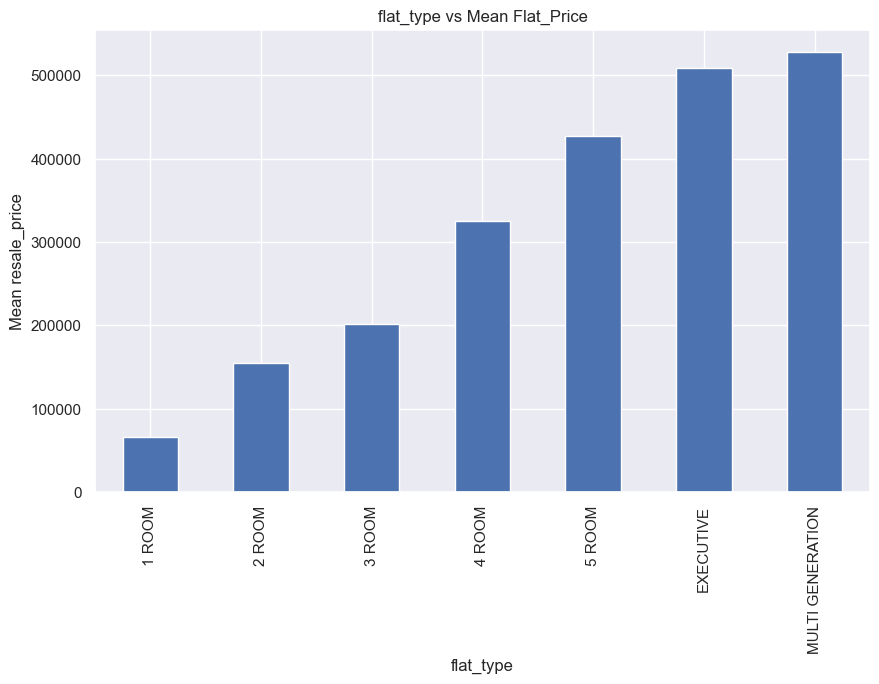

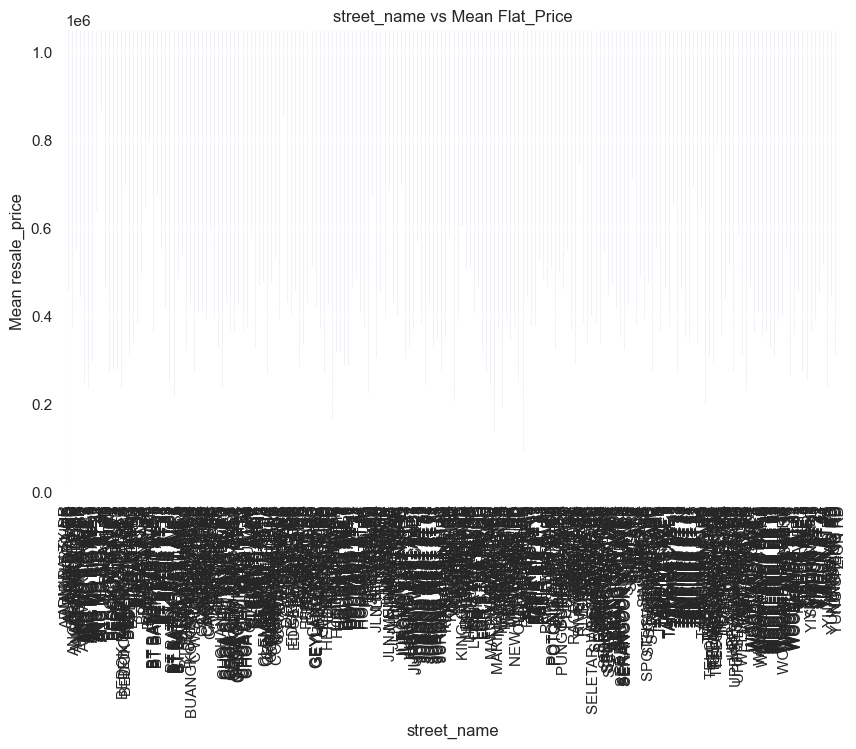

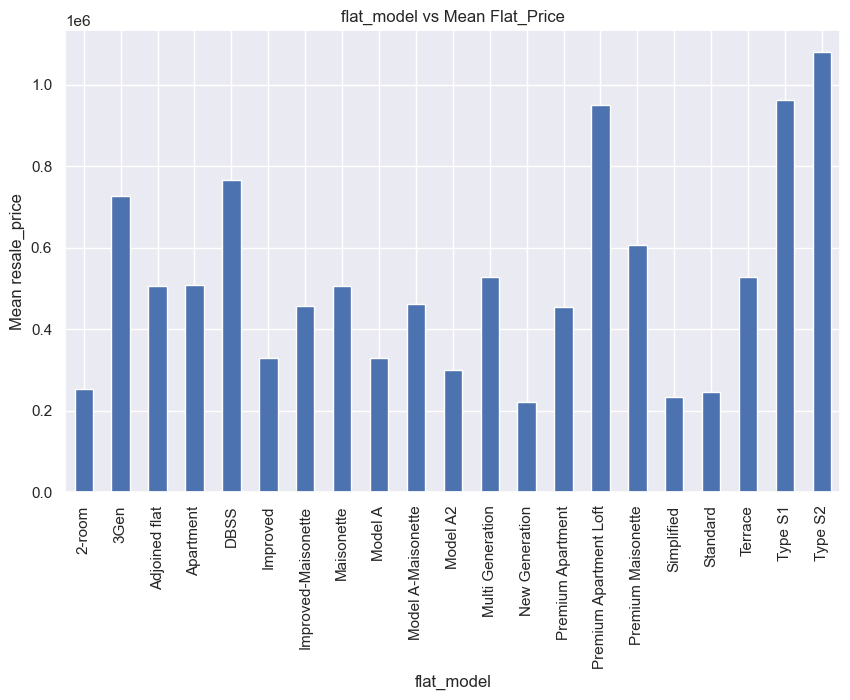

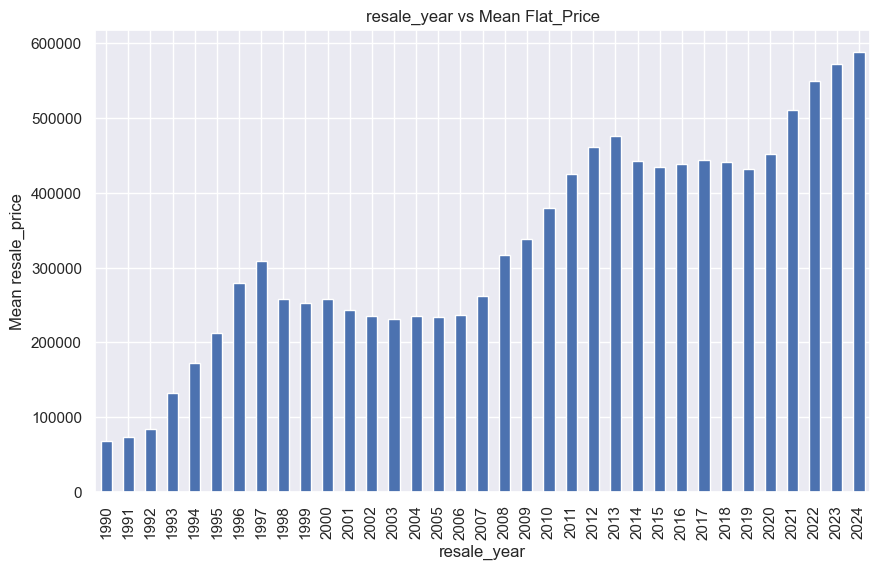

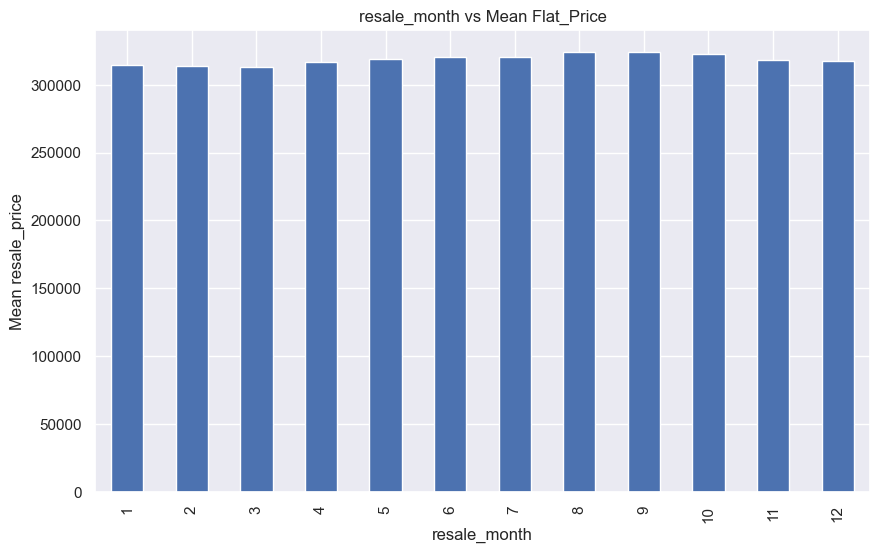

In [32]:
# List of features to plot
features = [
    'town',
 'flat_type',
 'street_name',
 'flat_model',
 'resale_year',
 'resale_month'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Mean Flat_Price')
    plt.show()

In [33]:
df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977,9000.0,68.000000,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977,6000.0,68.000000,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977,8000.0,68.000000,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977,6000.0,68.000000,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,New Generation,1976,47200.0,68.000000,1990,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173801,YISHUN,EXECUTIVE,614.0,YISHUN ST 61,142.0,Apartment,1987,800000.0,62.250000,2024,2,7,9
173802,YISHUN,EXECUTIVE,824.0,YISHUN ST 81,146.0,Maisonette,1987,935000.0,62.833333,2024,2,7,9
173803,YISHUN,EXECUTIVE,826.0,YISHUN ST 81,146.0,Maisonette,1988,908000.0,62.916667,2024,2,4,6
173804,YISHUN,EXECUTIVE,826.0,YISHUN ST 81,146.0,Maisonette,1988,800000.0,63.000000,2024,2,1,3


In [243]:
df.to_csv('cleaned_data.csv', index = False)